In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table('../Misc/fruit_data_with_colors.txt')

In [3]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
data.fruit_name.value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [6]:
data.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

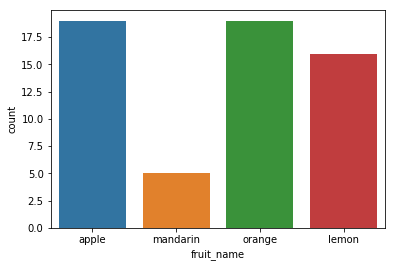

In [8]:
import seaborn as sns
sns.countplot(x='fruit_name', data=data)

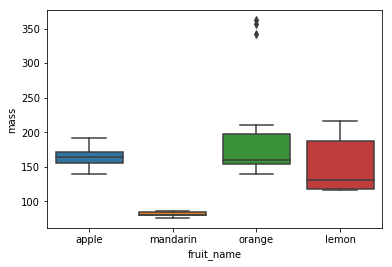

In [15]:
sns.boxplot(x='fruit_name', y='mass', data=data)

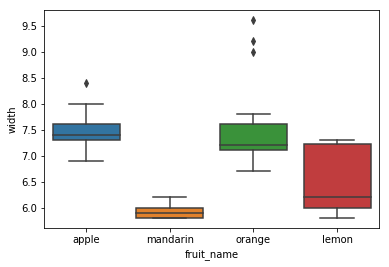

In [17]:
sns.boxplot(x='fruit_name', y = 'width', data=data)

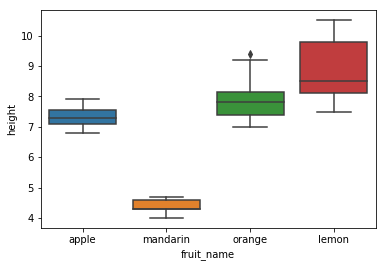

In [18]:
sns.boxplot(x='fruit_name', y = 'height', data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271617138D0>]],
      dtype=object)

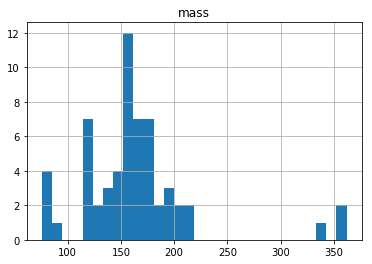

In [21]:
data.hist('mass', bins=30)

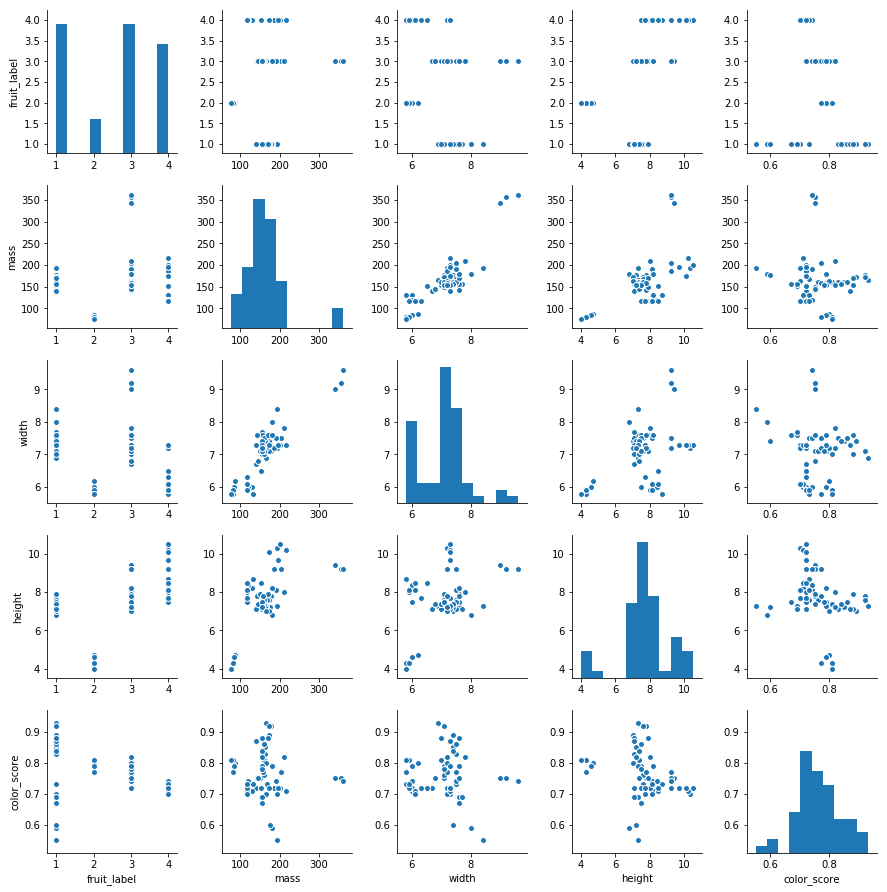

In [22]:
sns.pairplot(data)

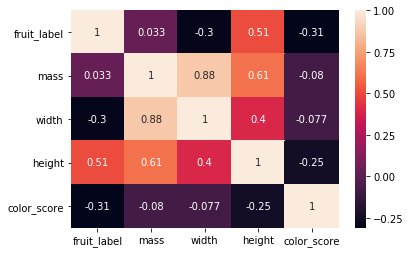

In [25]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [28]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = data[feature_names]
y = data['fruit_label']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('train : ', logreg.score(X_train, y_train))
print('test : ', logreg.score(X_test, y_test))

train :  0.7045454545454546
test :  0.4


In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('train : ', clf.score(X_train, y_train))
print('test : ', clf.score(X_test, y_test))

train :  1.0
test :  0.7333333333333333


In [61]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

print('train : ', clf.score(X_train, y_train))
print('test : ', clf.score(X_test, y_test))

train :  0.8863636363636364
test :  0.7333333333333333


In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('train : ', knn.score(X_train, y_train))
print('test : ', knn.score(X_test, y_test))

train :  0.9545454545454546
test :  1.0


In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('train : ', lda.score(X_train, y_train))
print('test : ', lda.score(X_test, y_test))

train :  0.8636363636363636
test :  0.6666666666666666


In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('train : ', gnb.score(X_train, y_train))
print('test : ', gnb.score(X_test, y_test))

train :  0.8636363636363636
test :  0.6666666666666666


In [66]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('train : ', svm.score(X_train, y_train))
print('test : ', svm.score(X_test, y_test))

train :  0.6136363636363636
test :  0.3333333333333333


In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



([<matplotlib.axis.XTick at 0x271645aab70>,
 <a list of 5 Text xticklabel objects>)

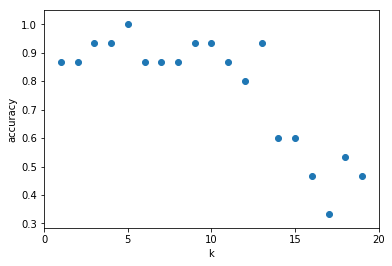

In [70]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2